## Введение

В данном датасете представлены все инциденты, случившиеся в Бостоне с 2015 по 2018 гг. Моя задача - проанализировать данные, чтобы выявить какие-либо закономерности.

# Считывание данных и предобработка

### Подключение модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

### Замер времени, необходимого для полного выполнения анализа

In [2]:
start_time = timeit.default_timer()

### Считывание данных

In [3]:
crime = pd.read_excel('crime.xlsx')

### Посмотрим на данные

In [4]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### Поменяем названия столбцов

In [5]:
crime.columns = ['number','code', 'type', 'description', 'district',
                 'area', 'shooting', 'date', 'year', 'month', 'weekday',
                 'hour', 'ucr_part', 'street',
                 'lat', 'long', 'location']

### Выведем общую информацию по таблице

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   number       319073 non-null  object        
 1   code         319073 non-null  int64         
 2   type         319073 non-null  object        
 3   description  319073 non-null  object        
 4   district     317308 non-null  object        
 5   area         319073 non-null  object        
 6   shooting     1019 non-null    object        
 7   date         319073 non-null  datetime64[ns]
 8   year         319073 non-null  int64         
 9   month        319073 non-null  int64         
 10  weekday      319073 non-null  object        
 11  hour         319073 non-null  int64         
 12  ucr_part     318983 non-null  object        
 13  street       308202 non-null  object        
 14  lat          299074 non-null  float64       
 15  long         299074 non-null  floa

### Удалим дубликаты

In [7]:
crime.duplicated().sum()

23

### 

In [8]:
crime = crime.drop_duplicates().reset_index(drop=True)

### Обработаем столбец shooting, заполнив пропуски буквой "N", а затем приведем к типу bool.

In [9]:
crime['shooting'] = crime['shooting'].fillna('N')

def shoot_def(x):
    return x == "Y"
crime['shooting'] = crime['shooting'].apply(shoot_def)

Убедимся, что столбец shooting принял тип bool.

In [10]:
crime['shooting'].unique()

array([False,  True])

### Обработаем столбец  date

Приведем столбец date к типу datetime и выделим новый столбец day  с днем месяца инцидента

In [11]:
pd.to_datetime(crime['date'], format = '%Y%m%d %H:%M:%S')
crime['day'] = crime['date'].dt.day

### Заполним пропуски

Заполним пропуски 'no_information'

In [12]:
crime['ucr_part']=crime['ucr_part'].fillna('no_information')
crime['district']=crime['district'].fillna('no_information')
crime['street']=crime['street'].fillna('no_information')

In [13]:
print(crime.isnull().sum())

number             0
code               0
type               0
description        0
district           0
area               0
shooting           0
date               0
year               0
month              0
weekday            0
hour               0
ucr_part           0
street             0
lat            19998
long           19998
location           0
day                0
dtype: int64


# Анализ данных

### Вывод

Сделали предобработку данных:
    переименовали столбцы
    убрали дубликаты
    заполнили пропуски (кроме lat и long, так как их и не планируем использовать)


### Топ-10 самых частых инцидентов

In [14]:
crime_gr_code = crime.groupby('code').agg(
    {'number':'count', 'type':'min','description':'min'}).reset_index().sort_values(by='number', ascending = False)


Посмотрим самые частые события:

In [15]:
crime_gr_code.head(10)

,code,number,type,description
169,3006,18783,Medical Assistance,SICK/INJURED/MEDICAL - PERSON
183,3115,18753,INVESTIGATE PERSON,INVESTIGATE PERSON
221,3831,16323,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE
76,1402,15153,Vandalism,VANDALISM
60,802,14799,Simple Assault,ASSAULT & BATTERY
198,3301,13099,Verbal Disputes,VERBAL DISPUTE
205,3410,11287,Towed,TOWED MOTOR VEHICLE
182,3114,11124,Investigate Property,INVESTIGATE PROPERTY
41,617,9074,Larceny,LARCENY IN A BUILDING $200 & OVER
151,2647,9042,Other,THREATS TO DO BODILY HARM


Код 3006 - приезд скорой помощи, найдем долю таких инцидентов от всей информации об инцидентах.

In [16]:
len(crime[crime['code']==3006])/len(crime)*100

5.887165021156558

Так как таких инцидентов почти 6%, то удалим их, чтобы анализировать только преступления.

In [17]:
crime1 = crime.query('code != 3006')

Повторим снова группировку

In [18]:
crime_gr_code = crime1.groupby('code').agg(
    {'number':'count', 'type':'min','description':'min'}).reset_index().sort_values(by='number', ascending = False)



Посмотрим топ-10 типов преступлений

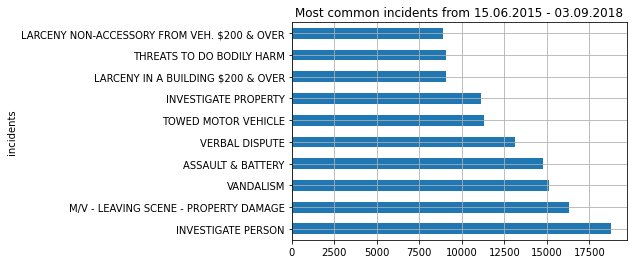

In [19]:
crime_gr_code_10 = crime_gr_code.head(10)
crime_gr_code_10.plot(
    kind = 'barh',
    x = 'description',
    y = 'number',
    title = 'Most common incidents from 15.06.2015 - 03.09.2018',
    xlabel = 'incidents',
    ylabel = 'amount',
    legend = False,
    grid = True
);

#### Вывод
Таким образом получаем, что "Investigate person" - самый популярный тип преступлений.

### Анализ дней недели

Посмотрим количество инцидентов по дням недели.

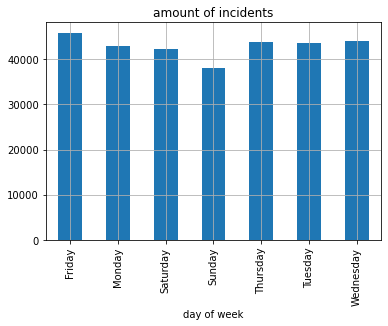

In [20]:
crime_gr_weekday = crime1.groupby('weekday').agg({
    'number':'count'}).reset_index().plot(
    kind = 'bar',
    x = 'weekday',
    title= 'amount of incidents',
    xlabel = 'day of week',
    legend = False,
    grid = True,

)

#### Вывод
Самый опасный день - пятница. Самый безопасный - воскресенье.

###  Анализ инцидентов по времени

Возьмем только те инциденты, данные по которым у нас есть за полные месяцы.

In [21]:
crime2 = crime.query('date > "2015-07-01 00:00:00" and date < "2018-09-01 00:00:00"')

Посмотри на количество инцидентов помесячно каждого года.

In [22]:
crime_gr_date = crime2.groupby(['year', 'month']).agg({
    'number':'count'})

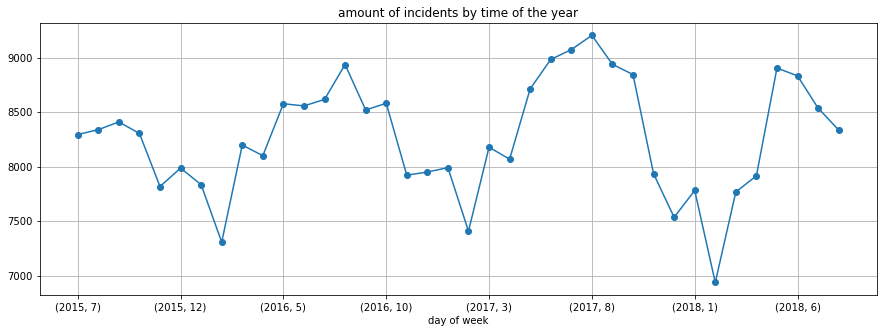

In [23]:
crime_gr_date.plot(
    style = '-o',
    title= 'amount of incidents by time of the year',
    xlabel = 'day of week',
    legend = False,
    grid = True,
    figsize = [15,5]

);

#### Вывод
Наименьшее количество преступлений - зима. Наибольшее количество преступлений - лето.

### Анализ инцидентов по дню месяца

Посмотрим, в какие из дней месяца случается наибольшее количество инцидентов.

In [24]:
crime_gr_day = crime1.groupby(['day']).agg({
    'number':'count'})

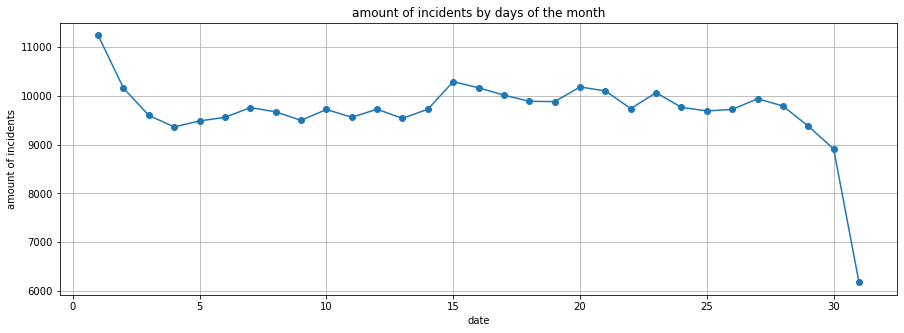

In [25]:
crime_gr_day.plot(
    style = '-o',
    title= 'amount of incidents by days of the month',
    xlabel = 'date',
    ylabel = 'amount of incidents',
    legend = False,
    grid = True,
    figsize = [15,5]

);

#### Вывод
В начале месяца преступления случаются чаще, чем в его конце.

### Анализ инцидентов по часам

Проанализируем, в какое время суток преступления наиболее часты.

In [26]:
crime_gr_hour = crime1.groupby(['hour']).agg({
    'number':'count'})

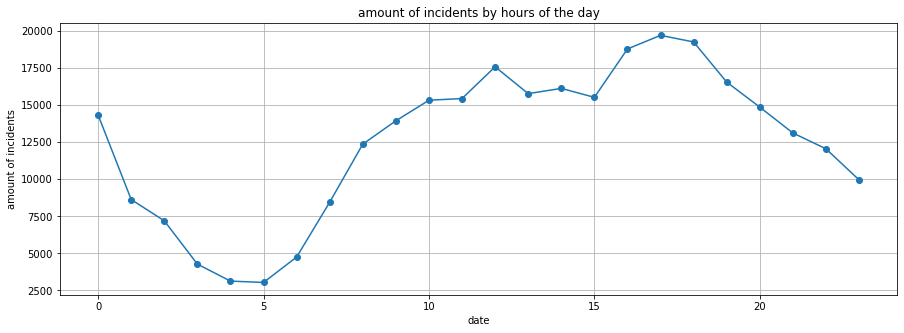

In [27]:
crime_gr_hour.plot(
    style = '-o',
    title= 'amount of incidents by hours of the day',
    xlabel = 'date',
    ylabel = 'amount of incidents',
    legend = False,
    grid = True,
    figsize = [15,5]

);

#### Вывод
Исходя из данных диаграммы можно сделать вывод, что наиболее опасным промежутком времени являются часы с 15:00 до 20:00

### Анализ районов

Проанализируем районы на количество преступлений, случающихся в каждом из них.

In [28]:
crime_gr_district = crime1.groupby(['district']).agg({
    'number':'count'})

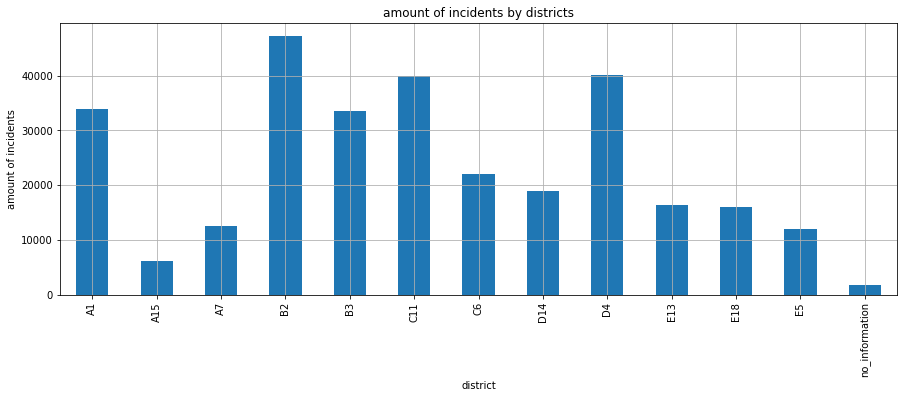

In [29]:
crime_gr_district.plot(
    kind = 'bar',
    title = 'amount of incidents by districts',
    xlabel = 'district',
    ylabel = 'amount of incidents',
    legend = False,
    grid = True,
    figsize = [15,5]
);

Поймем, оценив карту с раойнами, на сколько сильно отличаются районы друг от друга по площади.

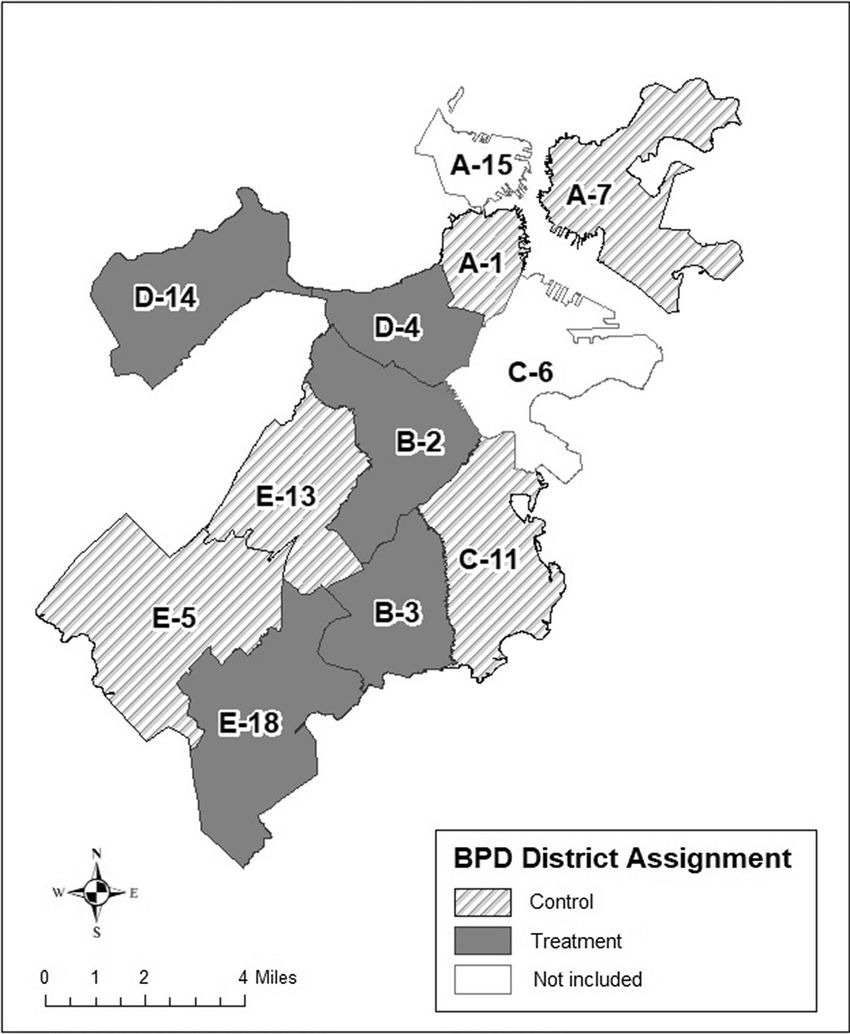

#### Вывод
Таким образом, самыми опасными районами являются B2, D4  и C11, которые располагаются рядом друг с другом.

### Анализ area

Проанализируем преступность по областям.

In [30]:
crime_gr_area = crime1.groupby(['area']).agg({
    'number':'count'})

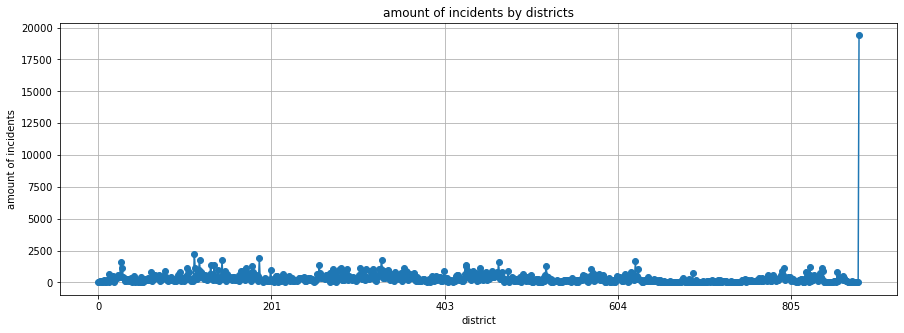

In [31]:
crime_gr_area.plot(
    style = '-o',
    title = 'amount of incidents by districts',
    xlabel = 'district',
    ylabel = 'amount of incidents',
    legend = False,
    grid = True,
    figsize = [15,5]
);

Наглядно видно, что один из районов выбивается из общей картины. Посмторим на таблицу еще раз.

In [32]:
crime_gr_area['number'].sort_values(ascending = False).head()

area
       19390
111     2259
186     1927
117     1782
329     1778
Name: number, dtype: int64

In [33]:
len(crime1[crime1['area']==' '])/len(crime1)*100

6.457586081720603

Почти 6,5% областей не указаны в таблице. Это сравнительно малое значение, поэтому можем удалить эти данные из таблицы.

In [34]:
crime3=crime1.query('area != " "')

In [35]:
crime_gr_area = crime3.groupby(['area']).agg({
    'number':'count'})

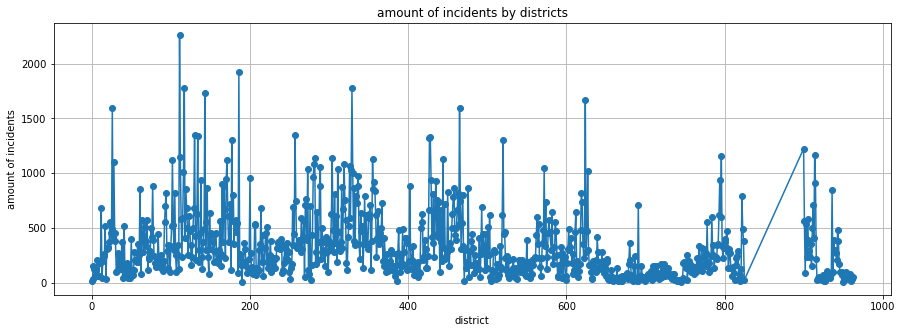

In [36]:
crime_gr_area.plot(
    style = '-o',
    title = 'amount of incidents by districts',
    xlabel = 'district',
    ylabel = 'amount of incidents',
    legend = False,
    grid = True,
    figsize = [15,5]
);

In [37]:
crime_gr_area['number'].sort_values(ascending = False).head()

area
111    2259
186    1927
117    1782
329    1778
143    1730
Name: number, dtype: int64

#### Вывод:
На графике нет определенной закономерности, все вершины графика находятся на разной высоте. Если анализировать почисленно, самыми опасными областями будут 111, 186 и 117.

### Анализ наиболее опасных улиц в ночное время

Отсортируем данные и возьмем только подходящее нам время (немного выше есть таблица, где выявлено самое опасное время дня, когда происходит больше всего инцидентов), уберем отсутствующую информацию.

In [38]:
crime4 = crime.query('(hour >21 or hour <5) and street != "no_information"')

In [39]:
crime_gr_street_night = crime4.groupby(['street']).agg({
    'number':'count'}).sort_values(by ='number',ascending=False).head(10)

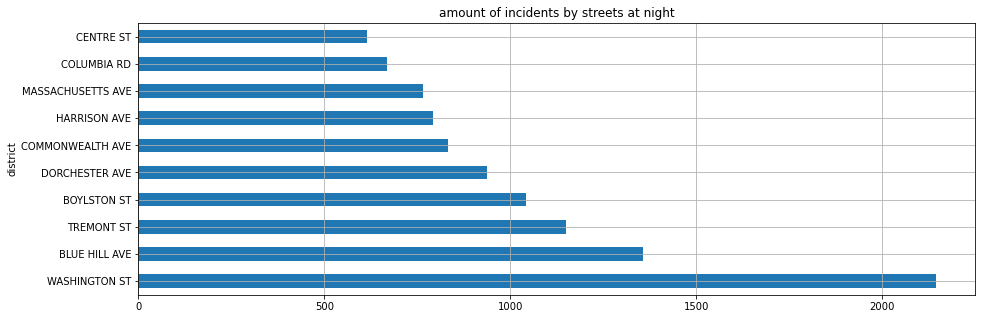

In [40]:
crime_gr_street_night.plot(
    kind = 'barh',
    title = 'amount of incidents by streets at night',
    xlabel = 'district',
    ylabel = 'amount of incidents',
    legend = False,
    grid = True,
    figsize = [15,5]
);

#### Вывод:
Чаще всего преступления происходят на  Washington street, она является самой опасной улицей.

### Проверка 13х чисел пятниц на частоту преступлений в этот день.

In [41]:
crime_gr_date = crime1.groupby(['year', 'month', 'day']).agg({
    'number':'count', 'weekday':'max'
}).reset_index()

Найдем среднестатистическое значение преступлений.

In [42]:
crime_gr_date['number'].describe()

count    1177.000000
mean      255.112150
std        31.907701
min       128.000000
25%       235.000000
50%       256.000000
75%       276.000000
max       368.000000
Name: number, dtype: float64

Найдем среднестатистическое значение преступлений по пятницам.

In [43]:
crime_gr_date.query('weekday == "Friday"')['number'].describe()

count    168.000000
mean     272.660714
std       30.955605
min      156.000000
25%      257.000000
50%      272.000000
75%      290.000000
max      360.000000
Name: number, dtype: float64

Найдем среднестатистическое значение преступлений по Пятницам 13х чисел.

In [44]:
crime_gr_date.query('(day == 13) and (weekday == "Friday")')['number'].describe()

count      6.000000
mean     262.500000
std       16.789878
min      238.000000
25%      257.250000
50%      260.500000
75%      268.250000
max      289.000000
Name: number, dtype: float64

#### Вывод:
Хотя в 13е пятницы и случается больше преступлений, чем в другие дни, это вязано с днем недели, а не с его числом.

### Анализ улиц по популярным инцидентам

In [45]:
list_pop_code = crime_gr_code.reset_index().head(5)['code']

In [46]:
for code in list_pop_code:
    print (crime_gr_code.reset_index().query('code == @code')['description'])
    print (crime1.query('code == @code').groupby('street').agg({
        'number':'count'}).reset_index().sort_values(by = 'number', ascending = False).head(5))
    print ()

0    INVESTIGATE PERSON
Name: description, dtype: object
              street  number
2223   WASHINGTON ST     811
224    BLUE HILL AVE     484
2368  no_information     335
386        CENTRE ST     304
255      BOYLSTON ST     265

1    M/V - LEAVING SCENE - PROPERTY DAMAGE
Name: description, dtype: object
              street  number
2179  no_information     992
222    BLUE HILL AVE     493
2048   WASHINGTON ST     469
600   DORCHESTER AVE     349
380        CENTRE ST     273

2    VANDALISM
Name: description, dtype: object
                street  number
2125     WASHINGTON ST     508
214      BLUE HILL AVE     274
2262    no_information     271
594     DORCHESTER AVE     237
454   COMMONWEALTH AVE     203

3    ASSAULT & BATTERY
Name: description, dtype: object
              street  number
1726   WASHINGTON ST     699
1835  no_information     425
202      BOYLSTON ST     384
176    BLUE HILL AVE     343
1633      TREMONT ST     326

4    VERBAL DISPUTE
Name: description, dtype: objec

In [47]:
elapsed = timeit.default_timer() - start_time

In [48]:
elapsed

46.226765656